# Measuring and plotting molecular coordinates from generated conformations

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PyMol
import cPickle as pickle

In [2]:
ibuH = pickle.load(open('ibuH_confs.pkl','rb'))

In [3]:
confs = ibuH.GetConformers()

We might be interested in the distribution of a particular coordinate in our set of molecular conformations. These can be accessed using a list comprehension, in which the function call to `GetDihedralConfDegree` takes as arguments the RDKit conformation object and the four atom ids describing the dihedral to be measured:

In [4]:
diheds = [Chem.rdMolTransforms.GetDihedralDeg(conf,1,3,4,5) for conf in confs]

We could print out this list, but it is too long to get much intution from. A better choice is to make a quick histogram of the distribution of angles. We can do this quickly using matplotlib:

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [6]:
plt.style.use('ggplot')

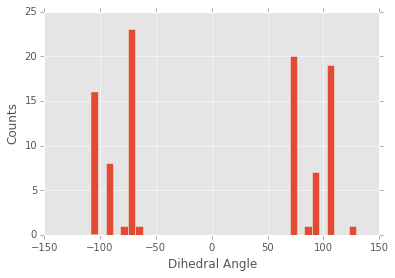

In [7]:
fig,ax = plt.subplots()
n,bins,patches = ax.hist(diheds,bins=36)
ax.set_xlabel('Dihedral Angle')
ax.set_ylabel('Counts');

It appears that there are six major peaks in the distribution with approximate symmetry around the plane of the benzene ring (0 degrees).

In [8]:
v= PyMol.MolViewer()

In [9]:
v.DeleteAll()
for cid,conf in enumerate(confs): 
    v.ShowMol(ibuH,confId=cid,name='Conf-%d'%cid,showOnly=False)

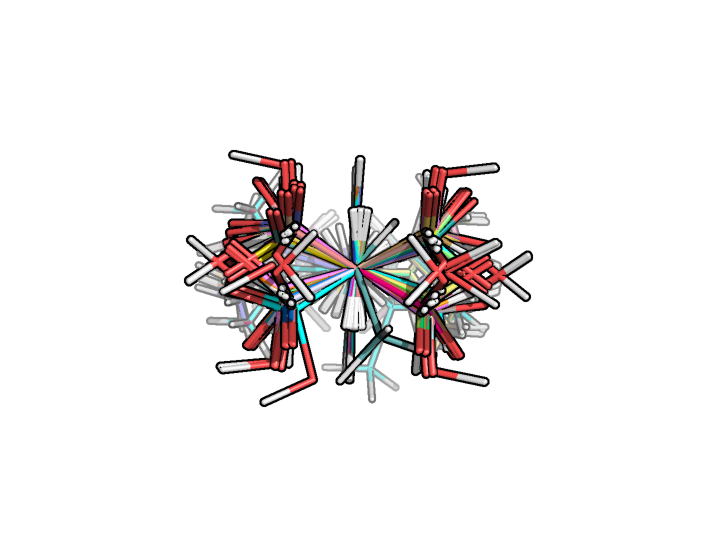

In [10]:
v.server.do('ray')
v.GetPNG()

We can see the six clusters of dihedral angles if we stare down the bond that is rotated.